## Importación modulos y datos

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("../data/conchillas_orig.csv", sep = ",",usecols=[0,1,2,3,4,5,6,7,8,9], low_memory=False) 

## Exploración datos

In [28]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo
0,96,5,6.18,1.83,13.57,10.00,8.10,6.04,5.15,LU
1,96,5,6.16,1.83,13.66,10.08,8.16,6.13,5.12,LU
2,96,5,6.14,1.81,13.61,10.01,8.20,6.14,5.10,LU
3,96,5,6.18,1.82,13.85,10.07,8.16,6.14,5.09,LU
4,96,6,6.58,2.16,11.69,9.10,6.56,4.92,5.49,LU


In [29]:
data.shape

(1212, 10)

In [30]:
data.dtypes

Lote           int64
Individuo      int64
AE           float64
LE           float64
AT           float64
LT           float64
AA           float64
LA           float64
NV           float64
Morfotipo     object
dtype: object

In [31]:
data["Morfotipo"].astype('category')

0       LU
1       LU
2       LU
3       LU
4       LU
        ..
1207    LU
1208    LB
1209    LB
1210    LB
1211    LB
Name: Morfotipo, Length: 1212, dtype: category
Categories (3, object): ['DU', 'LB', 'LU']

In [32]:
data.Morfotipo.unique()

array(['LU', 'LB', 'DU'], dtype=object)

In [33]:
data.describe()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.00000,1212.000000
mean,195.207921,23.966997,6.121980,1.753333,13.009167,9.633936,7.578465,6.06250,5.119604
std,100.401208,23.735375,0.976585,0.361939,1.931606,1.397661,1.215578,0.80903,0.300297
min,96.000000,1.000000,3.180000,0.690000,7.920000,6.140000,4.710000,4.21000,4.020000
25%,122.000000,8.000000,5.400000,1.490000,11.537500,8.677500,6.680000,5.47000,4.920000
50%,144.000000,16.000000,6.110000,1.760000,12.840000,9.545000,7.480000,5.97000,5.160000
75%,318.000000,27.000000,6.820000,2.010000,14.300000,10.670000,8.400000,6.58000,5.330000
max,404.000000,96.000000,9.110000,3.160000,19.200000,14.540000,12.010000,8.86000,5.930000


In [34]:
data.isnull().sum()

Lote         0
Individuo    0
AE           0
LE           0
AT           0
LT           0
AA           0
LA           0
NV           0
Morfotipo    0
dtype: int64

### Relación entre variables

<AxesSubplot:>

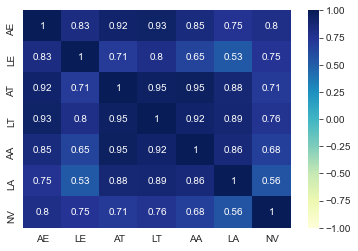

In [35]:
sns.heatmap(data.corr().iloc[2:9,2:9], vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)

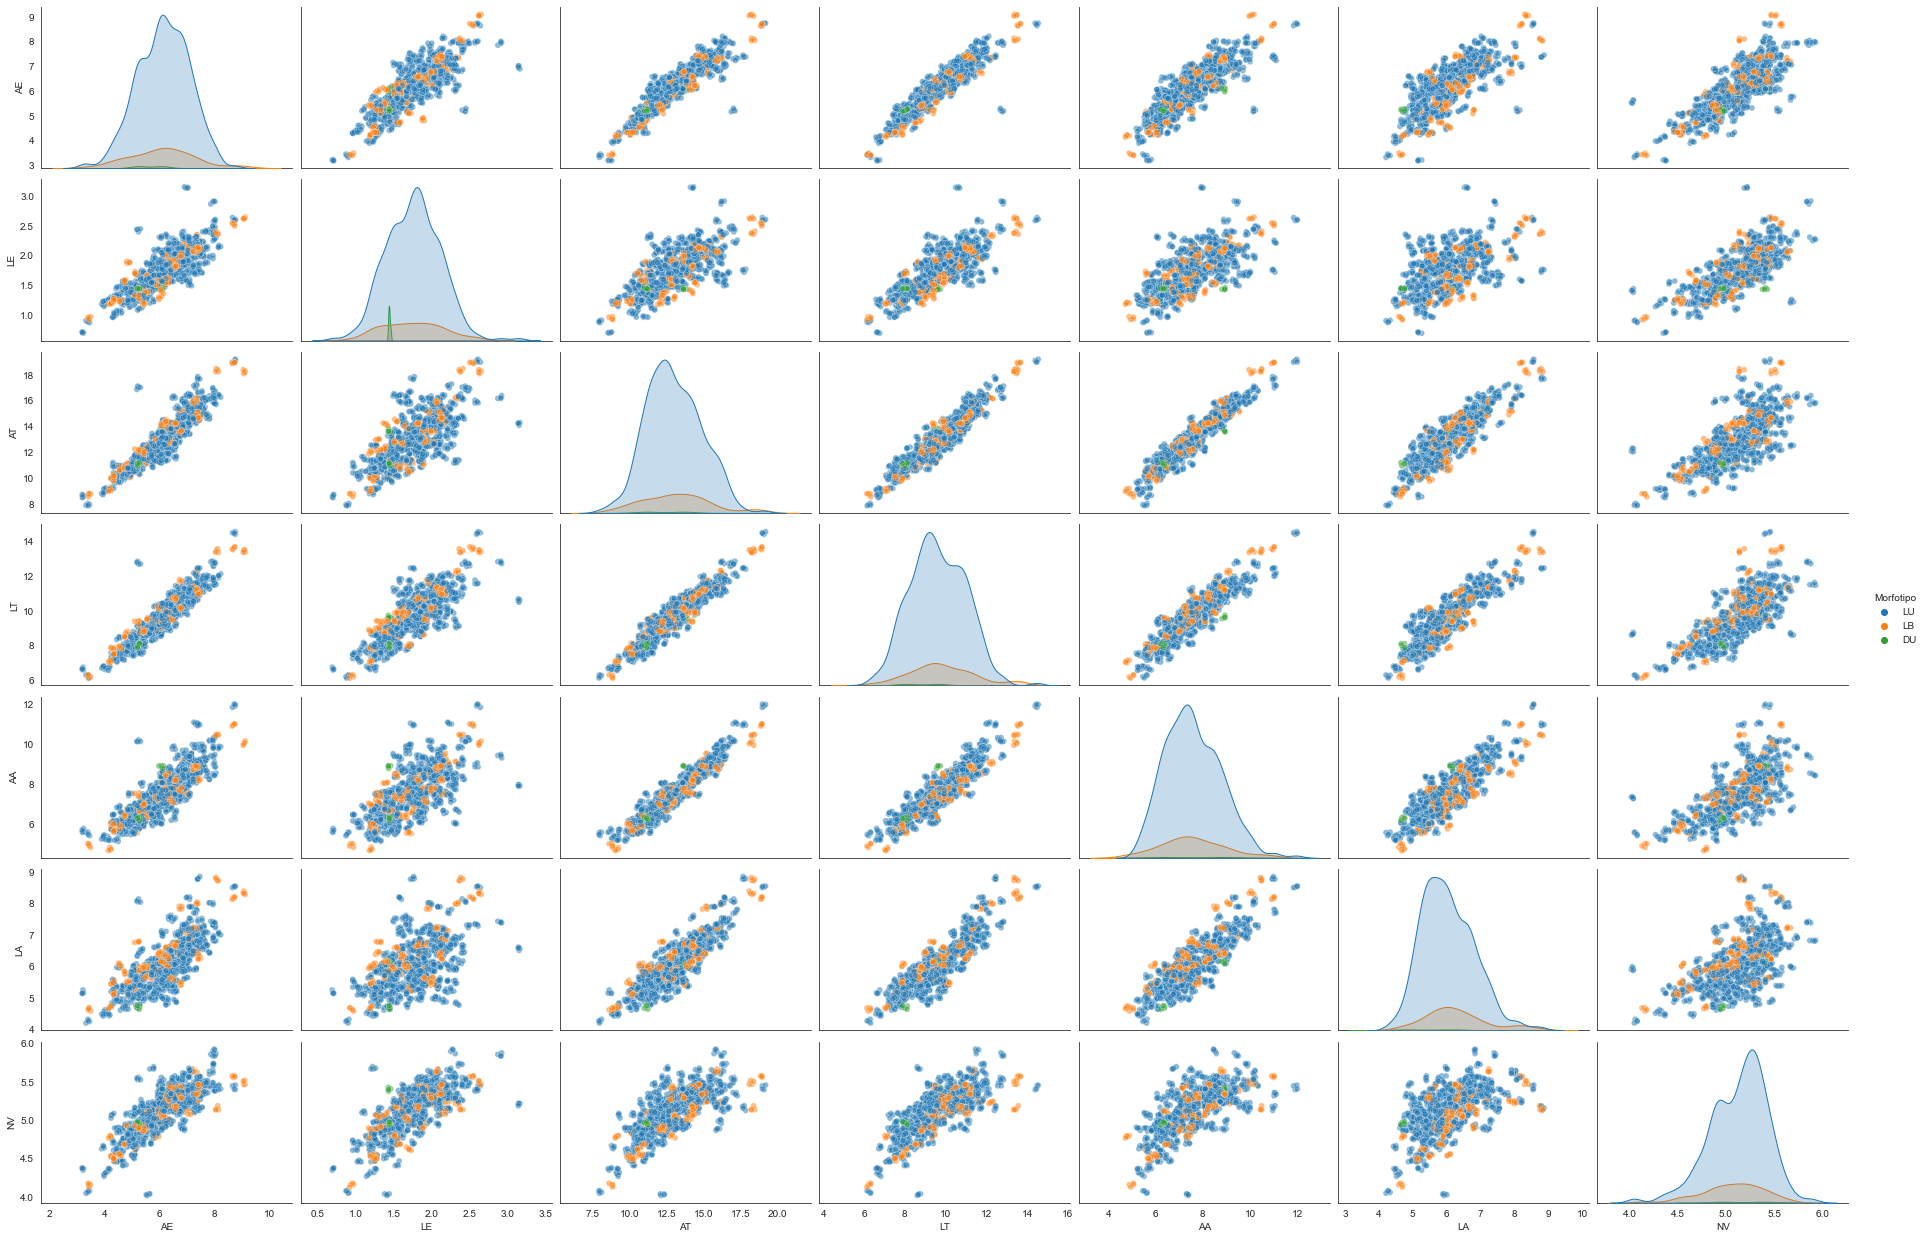

In [36]:
sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV'],\
         y_vars=['AE','LE','AT','LT','AA','LA','NV'],hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5);

In [37]:
def distribution_plotter(data, label, bins="auto"):    
    plt.figure(figsize = (10,5))
    sns.set_style("white")    
    dist = sns.histplot(data, bins=bins, stat = "count", kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = 500)    
    dist.set_title('Distribucion ', fontsize = 16)
    plt.xticks(rotation=45, ha='right')

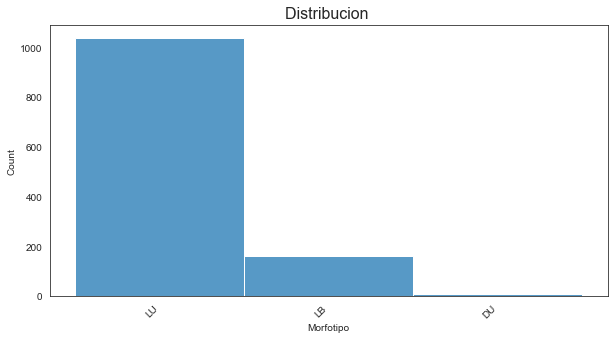

In [38]:
distribution_plotter(data["Morfotipo"],data["Morfotipo"].unique())

### Recuento por Etiqueta

In [39]:
print(pd.value_counts(data["Morfotipo"], sort = True, normalize=True))

LU    0.858086
LB    0.135314
DU    0.006601
Name: Morfotipo, dtype: float64


### Distribución de las observaciones

array([[<AxesSubplot:title={'center':'AE'}>,
        <AxesSubplot:title={'center':'LE'}>,
        <AxesSubplot:title={'center':'AT'}>],
       [<AxesSubplot:title={'center':'LT'}>,
        <AxesSubplot:title={'center':'AA'}>,
        <AxesSubplot:title={'center':'LA'}>],
       [<AxesSubplot:title={'center':'NV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

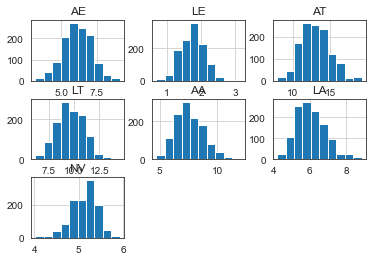

In [40]:
columns = data[["AE","LE","AT","LT","AA","LA","NV"]]
columns.hist()

## Creamos columnas de relación entre variables

In [41]:
data["Ratio_LE_AE"] = data["LE"]/data["AE"]
data["Ratio_LT_AT"] = data["LT"]/data["AT"]
data["Ratio_LA_AA"] = data["LA"]/data["AA"]
data["Ratio_LE_LT"] = data["LE"]/data["LT"]
data["Ratio_AE_AT"] = data["AE"]/data["AT"]
data["Ratio_LA_LT"] = data["LA"]/data["LT"]
data["Ratio_AA_AT"] = data["AA"]/data["AT"]
data["Ratio_LE_LA"] = data["LE"]/data["LA"]
data["Ratio_AE_AA"] = data["AE"]/data["AA"]

#aux copy: 'Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'

In [42]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
0,96,5,6.18,1.83,13.57,10.00,8.10,6.04,5.15,LU,0.296117,0.736920,0.745679,0.183000,0.455416,0.604000,0.596905,0.302980,0.762963
1,96,5,6.16,1.83,13.66,10.08,8.16,6.13,5.12,LU,0.297078,0.737921,0.751225,0.181548,0.450952,0.608135,0.597365,0.298532,0.754902
2,96,5,6.14,1.81,13.61,10.01,8.20,6.14,5.10,LU,0.294788,0.735489,0.748780,0.180819,0.451139,0.613387,0.602498,0.294788,0.748780
3,96,5,6.18,1.82,13.85,10.07,8.16,6.14,5.09,LU,0.294498,0.727076,0.752451,0.180735,0.446209,0.609732,0.589170,0.296417,0.757353
4,96,6,6.58,2.16,11.69,9.10,6.56,4.92,5.49,LU,0.328267,0.778443,0.750000,0.237363,0.562874,0.540659,0.561163,0.439024,1.003049


### Nueva visualización

<AxesSubplot:>

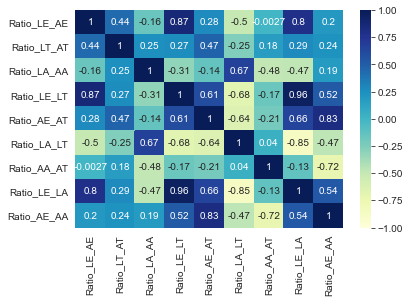

In [43]:
sns.heatmap(data.corr().iloc[9:19,9:19], vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)

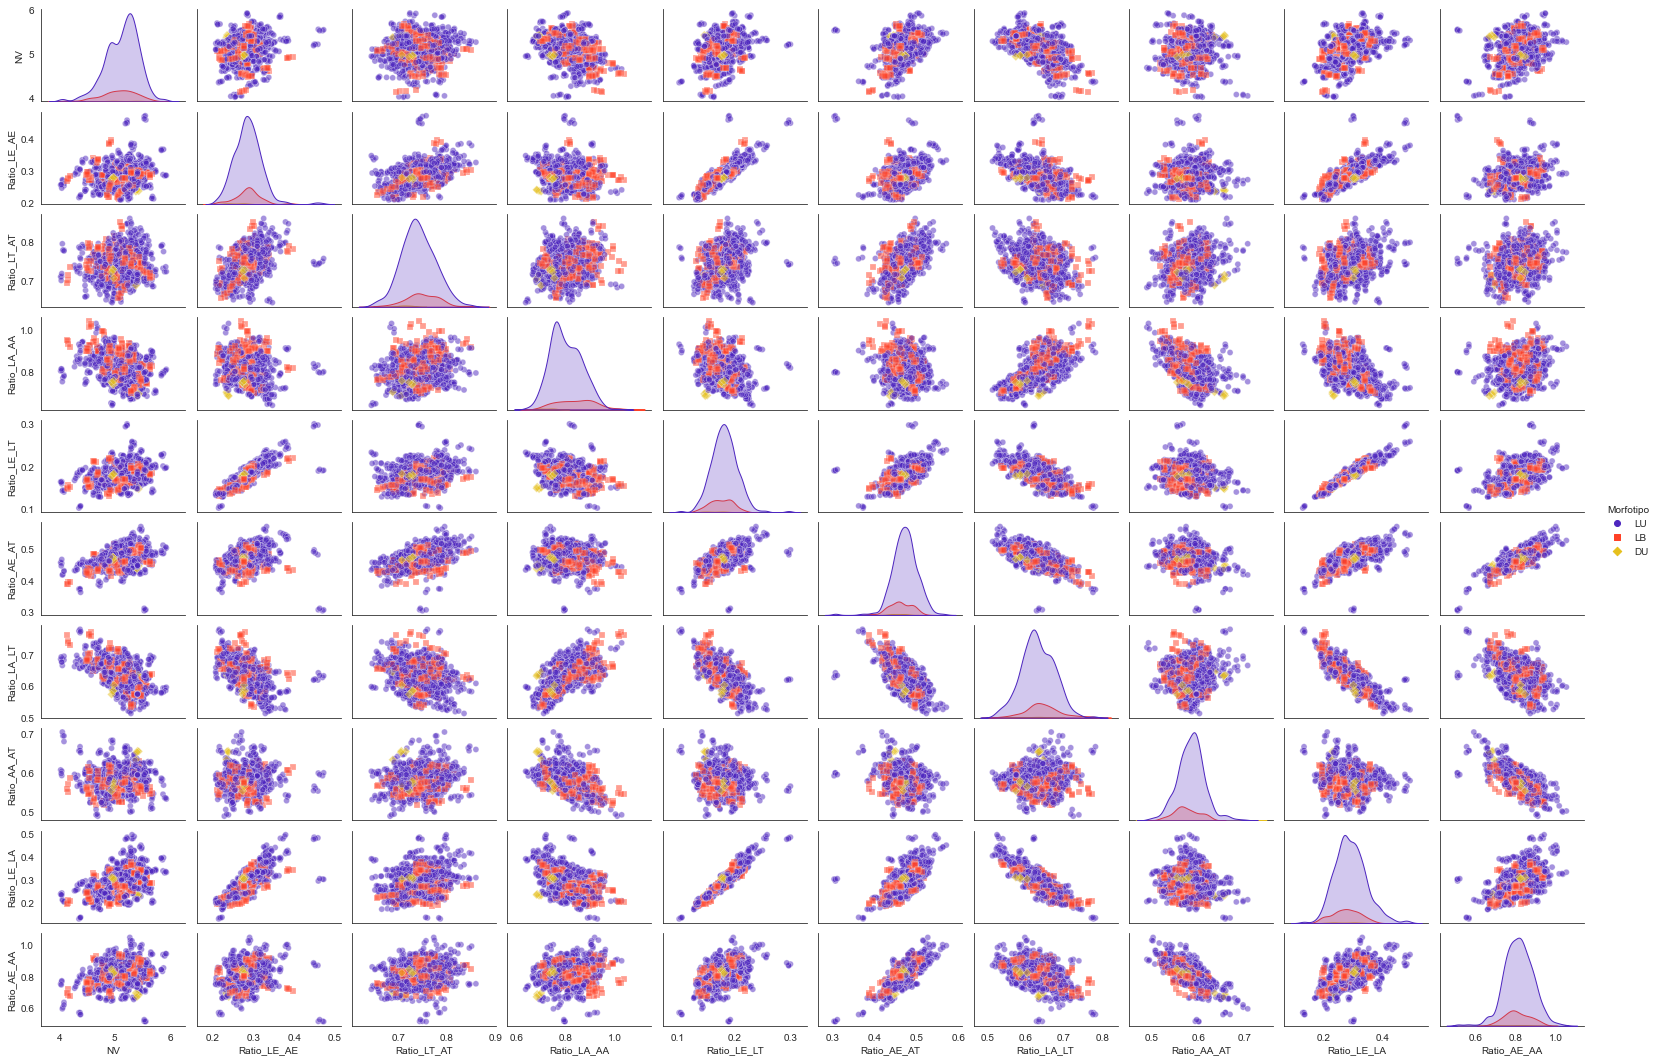

In [44]:
sns.pairplot(data=data,x_vars=['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
         y_vars=['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
             hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5, markers=['o','s','D'],palette='CMRmap', height=1.5);

In [45]:
# Guía de Colores Pairplot: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

## Creación Dummies
(creamos dummies de Morfotipo? Es nuestra variable target cuando tenemos el valor)

In [46]:
#data = pd.get_dummies(data=data, columns= ["Morfotipo"], drop_first = True)

In [47]:
#data.head()

In [48]:
#data.shape

## Exportación dataset listo

In [49]:
data.to_csv(r'../data/conchillas_listo.csv', index = False, header=True)